# **Introduction**


**PROBLEM STATEMENT: Patient Treatment Classfication**
<font size="3">predicting if a patient will be in **outpatient or inpatient** base on several parameter provide in the dataset</font>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
data = pd.read_csv(r"C:\Users\solomon\Downloads\dataset\hostpital patient\data-ori.csv")


In [3]:
data.head()

HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE   MCH  MCHC  \
0         35.1          11.8         4.65        6.3          310  25.4  33.6   
1         43.5          14.8         5.39       12.7          334  27.5  34.0   
2         33.5          11.3         4.74       13.2          305  23.8  33.7   
3         39.1          13.7         4.98       10.5          366  27.5  35.0   
4         30.9           9.9         4.23       22.1          333  23.4  32.0   

    MCV  AGE SEX SOURCE  
0  75.5    1   F    out  
1  80.7    1   F    out  
2  70.7    1   F    out  
3  78.5    1   F    out  
4  73.0    1   M    out

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4412 entries, 0 to 4411
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   4412 non-null   float64
 1   HAEMOGLOBINS  4412 non-null   float64
 2   ERYTHROCYTE   4412 non-null   float64
 3   LEUCOCYTE     4412 non-null   float64
 4   THROMBOCYTE   4412 non-null   int64  
 5   MCH           4412 non-null   float64
 6   MCHC          4412 non-null   float64
 7   MCV           4412 non-null   float64
 8   AGE           4412 non-null   int64  
 9   SEX           4412 non-null   object 
 10  SOURCE        4412 non-null   object 
dtypes: float64(7), int64(2), object(2)
memory usage: 379.3+ KB


In [5]:
data.nunique()

HAEMATOCRIT     326
HAEMOGLOBINS    128
ERYTHROCYTE     433
LEUCOCYTE       276
THROMBOCYTE     554
MCH             189
MCHC            105
MCV             406
AGE              95
SEX               2
SOURCE            2
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data["SEX"] = label.fit_transform(data["SEX"])
data["SOURCE"] = label.fit_transform(data["SOURCE"])

In [7]:
data.head()

HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE   MCH  MCHC  \
0         35.1          11.8         4.65        6.3          310  25.4  33.6   
1         43.5          14.8         5.39       12.7          334  27.5  34.0   
2         33.5          11.3         4.74       13.2          305  23.8  33.7   
3         39.1          13.7         4.98       10.5          366  27.5  35.0   
4         30.9           9.9         4.23       22.1          333  23.4  32.0   

    MCV  AGE  SEX  SOURCE  
0  75.5    1    0       1  
1  80.7    1    0       1  
2  70.7    1    0       1  
3  78.5    1    0       1  
4  73.0    1    1       1

In [8]:
data.isna().sum()

HAEMATOCRIT     0
HAEMOGLOBINS    0
ERYTHROCYTE     0
LEUCOCYTE       0
THROMBOCYTE     0
MCH             0
MCHC            0
MCV             0
AGE             0
SEX             0
SOURCE          0
dtype: int64

**Data Analysis And Overview**

In [9]:
from ydata_profiling import ProfileReport
report = ProfileReport(data,title = "Electronic Health Record ")

In [10]:
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Detecting Ouliers**

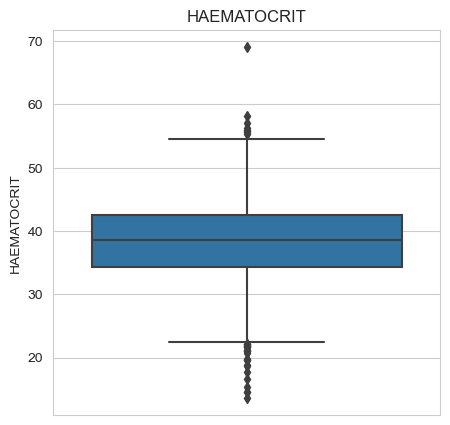

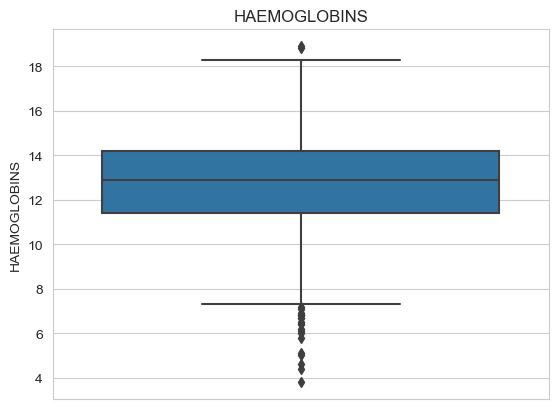

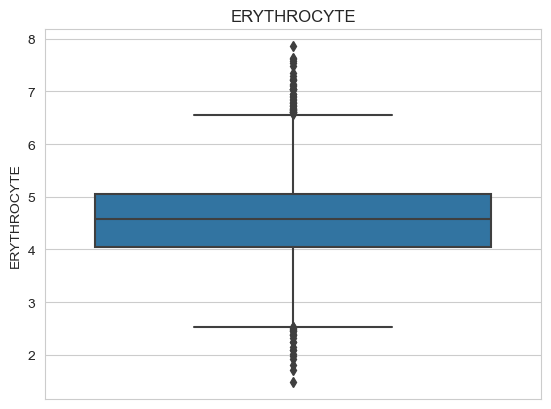

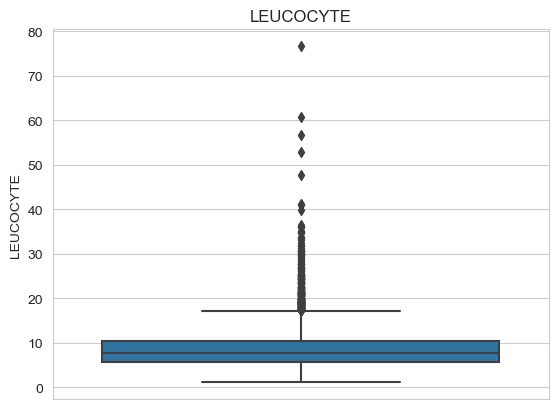

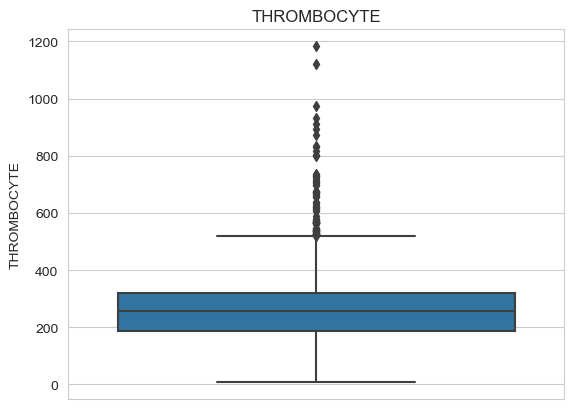

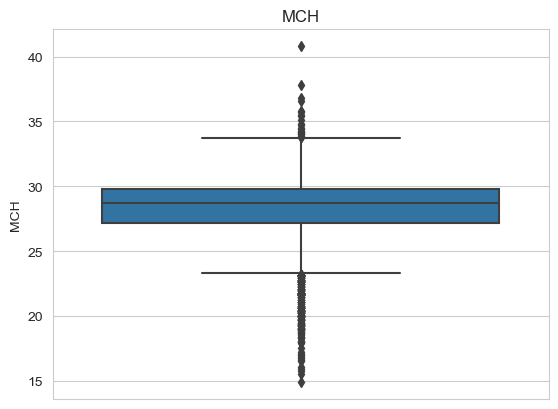

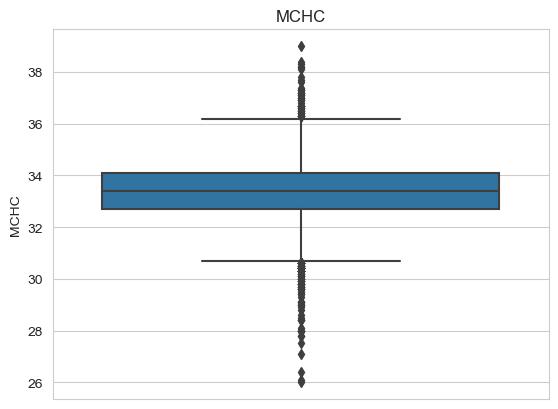

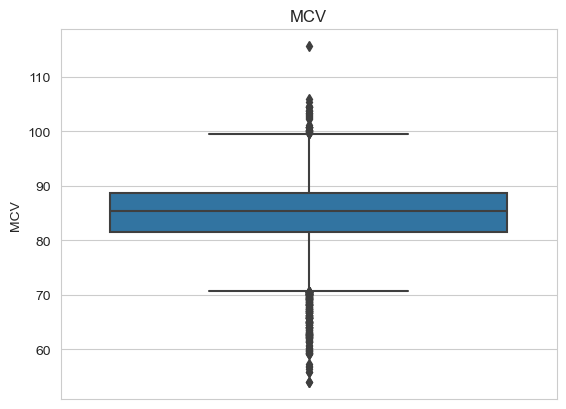

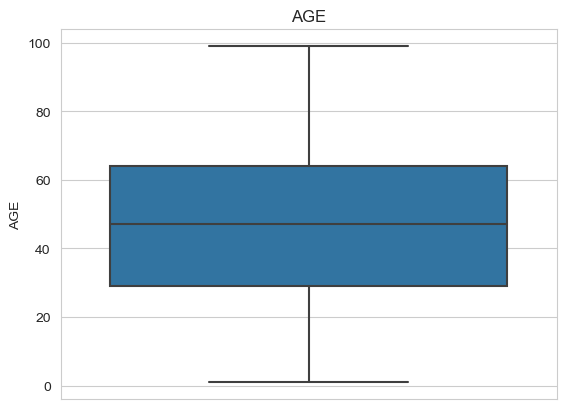

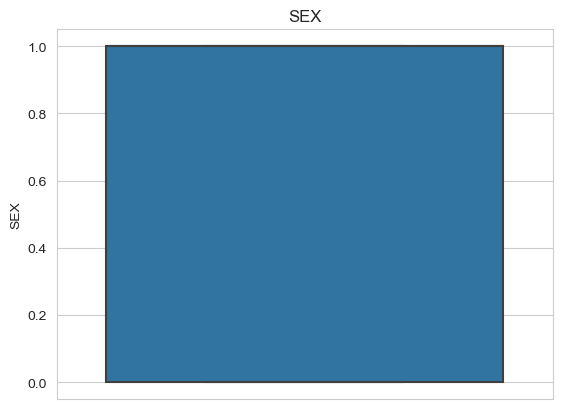

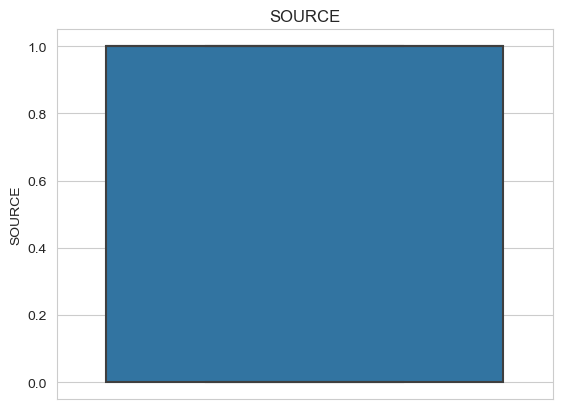

In [11]:
import seaborn as sns
plt.figure(figsize=(5,5))
for i in data.columns:
    sns.boxplot(data,y= i )
    plt.title(str.upper(i))
    plt.show()

In [12]:
data.head()

HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE   MCH  MCHC  \
0         35.1          11.8         4.65        6.3          310  25.4  33.6   
1         43.5          14.8         5.39       12.7          334  27.5  34.0   
2         33.5          11.3         4.74       13.2          305  23.8  33.7   
3         39.1          13.7         4.98       10.5          366  27.5  35.0   
4         30.9           9.9         4.23       22.1          333  23.4  32.0   

    MCV  AGE  SEX  SOURCE  
0  75.5    1    0       1  
1  80.7    1    0       1  
2  70.7    1    0       1  
3  78.5    1    0       1  
4  73.0    1    1       1

In [13]:
skew = data.iloc[:, :-3]

**Treating Outliers**

In [14]:
skew_cols = list(data.iloc[:, :-3].columns)
nom_cols = data.iloc[:, -3:]

In [15]:
skew_cols

['HAEMATOCRIT',
 'HAEMOGLOBINS',
 'ERYTHROCYTE',
 'LEUCOCYTE',
 'THROMBOCYTE',
 'MCH',
 'MCHC',
 'MCV']

In [16]:
from feature_engine.outliers import Winsorizer
winsorizer = Winsorizer(capping_method = "gaussian",tail = "both",fold = 3)
data[skew_cols] = winsorizer.fit_transform(data[skew_cols])

In [17]:
data.head()

HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE   MCH  MCHC  \
0         35.1          11.8         4.65        6.3        310.0  25.4  33.6   
1         43.5          14.8         5.39       12.7        334.0  27.5  34.0   
2         33.5          11.3         4.74       13.2        305.0  23.8  33.7   
3         39.1          13.7         4.98       10.5        366.0  27.5  35.0   
4         30.9           9.9         4.23       22.1        333.0  23.4  32.0   

    MCV  AGE  SEX  SOURCE  
0  75.5    1    0       1  
1  80.7    1    0       1  
2  70.7    1    0       1  
3  78.5    1    0       1  
4  73.0    1    1       1

In [18]:
X = data.iloc[:, :-1]
y = data.iloc[:, 10]

In [19]:
from sklearn.preprocessing import RobustScaler
scale = RobustScaler()
X = scale.fit_transform(X)

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=45)

**Modal Selection**

In [28]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier()
train,test = clf.fit(X_train,X_test,y_train,y_test)
train

100%|██████████| 29/29 [00:09<00:00,  2.96it/s]

[LightGBM] [Info] Number of positive: 1971, number of negative: 1338
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000365 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1583
[LightGBM] [Info] Number of data points in the train set: 3309, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.595648 -> initscore=0.387365
[LightGBM] [Info] Start training from score 0.387365


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.76               0.74     0.74      0.76   
LGBMClassifier                     0.75               0.73     0.73      0.75   
ExtraTreesClassifier               0.75               0.73     0.73      0.75   
XGBClassifier                      0.74               0.72     0.72      0.74   
QuadraticDiscriminantAnalysis      0.72               0.72     0.72      0.72   
SVC                                0.75               0.72     0.72      0.74   
BaggingClassifier                  0.73               0.72     0.72      0.73   
NuSVC                              0.74               0.71     0.71      0.74   
AdaBoostClassifier                 0.73               0.71     0.71      0.73   
CalibratedClassifierCV             0.73               0.70     0.70      0.72   
LogisticRegression                 0.73               0.70     0.70      0.72   
LinearDiscriminantAnalysis         0.73               0.70     0.70      0.72   
LinearSVC                          0.73               0.70     0.70      0.72   
KNeighborsClassifier               0.72               0.70     0.70      0.71   
RidgeClassifierCV                  0.73               0.70     0.70      0.72   
RidgeClassifier                    0.73               0.70     0.70      0.72   
LabelSpreading                     0.70               0.69     0.69      0.70   
LabelPropagation                   0.70               0.69     0.69      0.70   
SGDClassifier                      0.71               0.69     0.69      0.70   
GaussianNB                         0.70               0.68     0.68      0.70   
NearestCentroid                    0.68               0.67     0.67      0.68   
DecisionTreeClassifier             0.66               0.65     0.65      0.66   
BernoulliNB                        0.65               0.64     0.64      0.65   
ExtraTreeClassifier                0.63               0.62     0.62      0.63   
Perceptron                         0.62               0.62     0.62      0.62   
PassiveAggressiveClassifier        0.64               0.60     0.60      0.63   
DummyClassifier                    0.60               0.50     0.50      0.44   

                               Time Taken  
Model                                      
RandomForestClassifier               1.73  
LGBMClassifier                       0.16  
ExtraTreesClassifier                 1.40  
XGBClassifier                        0.18  
QuadraticDiscriminantAnalysis        0.02  
SVC                                  0.82  
BaggingClassifier                    1.09  
NuSVC                                1.07  
AdaBoostClassifier                   0.52  
CalibratedClassifierCV               0.12  
LogisticRegression                   0.05  
LinearDiscriminantAnalysis           0.02  
LinearSVC                            0.23  
KNeighborsClassifier                 0.13  
RidgeClassifierCV                    0.02  
RidgeClassifier                      0.02  
LabelSpreading                       1.06  
LabelPropagation                     0.59  
SGDClassifier                        0.06  
GaussianNB                           0.02  
NearestCentroid                      0.14  
DecisionTreeClassifier               0.11  
BernoulliNB                          0.03  
ExtraTreeClassifier                  0.06  
Perceptron                           0.02  
PassiveAggressiveClassifier          0.03  
DummyClassifier                      0.03

In [22]:
train.sort_values("Accuracy",ascending=False)["F1 Score"]

Model
RandomForestClassifier          0.76
ExtraTreesClassifier            0.75
SVC                             0.74
LGBMClassifier                  0.75
XGBClassifier                   0.74
NuSVC                           0.74
BaggingClassifier               0.73
AdaBoostClassifier              0.73
CalibratedClassifierCV          0.72
LogisticRegression              0.72
LinearDiscriminantAnalysis      0.72
RidgeClassifierCV               0.72
LinearSVC                       0.72
RidgeClassifier                 0.72
KNeighborsClassifier            0.71
QuadraticDiscriminantAnalysis   0.72
SGDClassifier                   0.70
GaussianNB                      0.70
LabelSpreading                  0.70
LabelPropagation                0.70
NearestCentroid                 0.68
DecisionTreeClassifier          0.66
BernoulliNB                     0.65
PassiveAggressiveClassifier     0.63
ExtraTreeClassifier             0.63
Perceptron                      0.62
DummyClassifier                 

**Training the model**

In [23]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators= 100)
classifier = classifier.fit(X_train,y_train)

In [24]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_estimators":[20,40,60,80,100],"criterion":["gini","entropy"],"max_features":["sqrt","auto","log2"]}

best_param_grid = GridSearchCV(estimator=classifier,param_grid=parameters)
best_param_grid = best_param_grid.fit(X_train,y_train)


0.7494791833302101

In [27]:
best_param_grid.best_score_,best_param_grid.best_params_

(0.7494791833302101,
 {'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 40})

In [29]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators= 40, criterion='entropy',max_features='log2')
classifier = classifier.fit(X_train,y_train)

In [30]:
y_pred = classifier.predict(X_test)

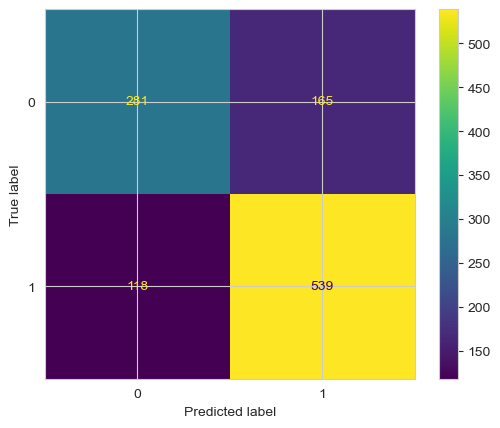

In [32]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.show()